# **User Recommendation**

## **Dataset Summary**

Dataset Pekerjaan: Dataset ini harus berisi informasi tentang pekerjaan yang tersedia, seperti nama pekerjaan, deskripsi pekerjaan, keterampilan yang diperlukan, persyaratan pendidikan, pengalaman kerja, lokasi pekerjaan, dan atribut lain yang relevan.

Dataset user: Dataset ini merupakan kumpulan informasi yang mencakup pendidikan, keterampilan, dan preferensi pengguna terkait pekerjaan. Data ini juga membantu dalam mencocokkan persyaratan pekerjaan dengan profil pengguna, sementara preferensi pengguna, seperti lokasi, keterampilan, industri, gaji, dan atribut lain yang relevan, digunakan untuk mencocokkan pengguna dengan pekerjaan yang sesuai.

## **Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

## **Data Understanding**

In [2]:
# data path
job = pd.read_csv('list_pekerjaan.csv')
user = pd.read_csv('user.csv')

# see the amount of data
print(f"Jumlah data pekerjaan: {len(job.Id_Pekerjaan.unique())}")
print(f'Jumlah data user: {len(user.Id_Pengguna.unique())}')

Jumlah data pekerjaan: 20
Jumlah data user: 20


In [3]:
# see job list
job.head(5)

,Id_Pekerjaan,Nama_Pekerjaan,Deskripsi_Pekerjaan,Persyaratan_Pendidikan,Keterampilan,Lokasi_Pekerjaan,Gaji,Industri
0,1,Tukang Kebun,"Melakukan perawatan kebun, seperti menyiram ta...",Tidak memerlukan pendidikan formal,Keterampilan kebun,Jakarta,Rp 3.000.000 - Rp 4.000.000,Pertanian
1,2,Pengrajin Anyaman,Membuat anyaman dari bahan-bahan alami seperti...,Tidak memerlukan pendidikan formal,Keterampilan anyaman,Jakarta,Rp 3.500.000 - Rp 4.500.000,Kerajinan
2,3,Penjahit,Menghasilkan produk jadi berdasarkan desain da...,Tidak memerlukan pendidikan formal,Keterampilan menjahit,Surabaya,Rp 4.000.000 - Rp 5.000.000,Fashion
3,4,Pembuat Kerajinan Tangan,Membuat produk kerajinan tangan seperti tas ra...,Tidak memerlukan pendidikan formal,Keterampilan kerajinan tangan,Yogyakarta,Rp 4.500.000 - Rp 5.500.000,Kerajinan
4,5,Pengrajin Batik,Menghasilkan batik dengan teknik tradisional,Tidak memerlukan pendidikan formal,Keterampilan batik,Medan,Rp 5.000.000 - Rp 6.000.000,Fashion


In [4]:
# see users
user.head(5)

,Id_Pengguna,Nama_Pengguna,Usia,Pendidikan,Keterampilan,Industri
0,1,Andi,30,SMA,Keterampilan kebun,Pertanian
1,2,Budi,28,S1,Keterampilan anyaman,Kerajinan
2,3,Cindy,27,SMA,Keterampilan menjahit,Fashion
3,4,Dini,32,D3,Keterampilan kerajinan tangan,Kerajinan
4,5,Eko,29,SMA,Keterampilan batik,Fashion


## **Data Preprocessing**

In [5]:
# job information
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id_Pekerjaan            20 non-null     int64 
 1   Nama_Pekerjaan          20 non-null     object
 2   Deskripsi_Pekerjaan     20 non-null     object
 3   Persyaratan_Pendidikan  20 non-null     object
 4   Keterampilan            20 non-null     object
 5   Lokasi_Pekerjaan        20 non-null     object
 6   Gaji                    20 non-null     object
 7   Industri                20 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.4+ KB


In [6]:
# user information
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id_Pengguna    20 non-null     int64 
 1   Nama_Pengguna  20 non-null     object
 2   Usia           20 non-null     int64 
 3   Pendidikan     20 non-null     object
 4   Keterampilan   20 non-null     object
 5   Industri       20 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


## **Exploratory Data Analysis**

<Axes: xlabel='Pendidikan', ylabel='count'>

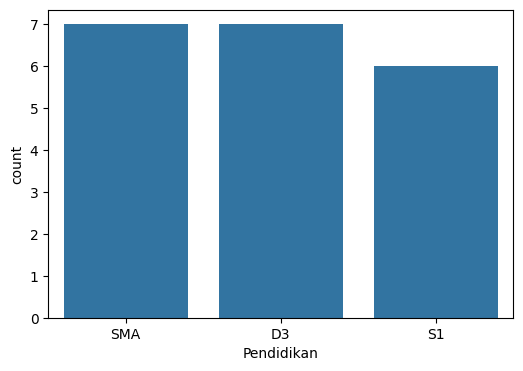

In [7]:
# countplot Pendidikan
plt.figure(figsize=(6, 4))
sns.countplot(x=user['Pendidikan'], data=user, order=user['Pendidikan'].value_counts().index)

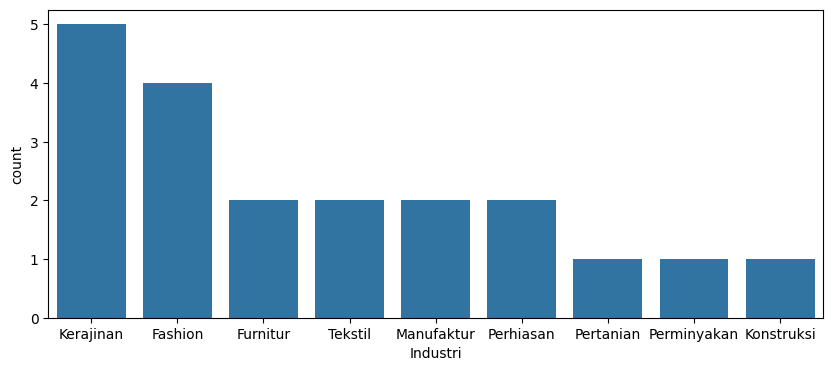

In [8]:
# countplot Industri
plt.figure(figsize=(10, 4))
ax = sns.countplot(x=user['Industri'], data=user, order=user['Industri'].value_counts().index)

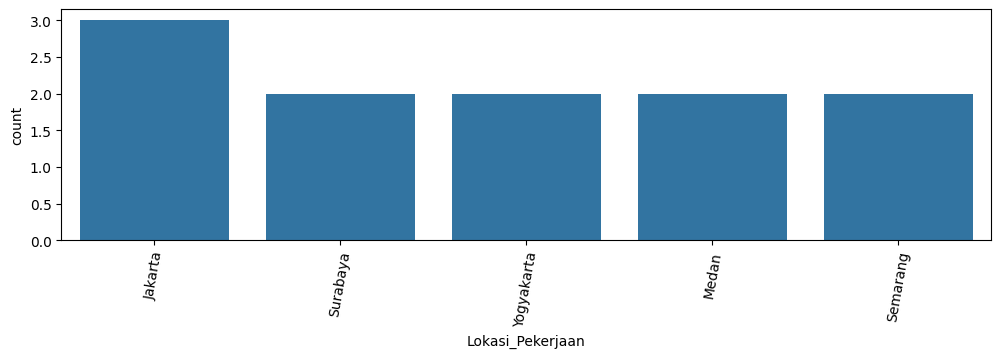

In [9]:
# countplot Lokasi_Pekerjaan
plt.figure(figsize=(12, 3))
top_10_places = job['Lokasi_Pekerjaan'].value_counts().nlargest(5).index
ax = sns.countplot(x=job['Lokasi_Pekerjaan'], data=job, order=top_10_places)
plt.xticks(rotation=80)
plt.show()

## **Data Cleaning**

In [10]:
# find duplicate values
user.isnull().sum()

Id_Pengguna      0
Nama_Pengguna    0
Usia             0
Pendidikan       0
Keterampilan     0
Industri         0
dtype: int64

In [11]:
# find duplicate values
job.isnull().sum()

Id_Pekerjaan              0
Nama_Pekerjaan            0
Deskripsi_Pekerjaan       0
Persyaratan_Pendidikan    0
Keterampilan              0
Lokasi_Pekerjaan          0
Gaji                      0
Industri                  0
dtype: int64

In [12]:
# sort
preparation = user
preparation.sort_values('Industri').head()

,Id_Pengguna,Nama_Pengguna,Usia,Pendidikan,Keterampilan,Industri
2,3,Cindy,27,SMA,Keterampilan menjahit,Fashion
4,5,Eko,29,SMA,Keterampilan batik,Fashion
18,19,Tono,32,S1,Keterampilan pembuatan kain tenun,Fashion
12,13,Mira,28,D3,Keterampilan pemotongan kain,Fashion
5,6,Fani,31,D3,Keterampilan pemotongan kayu,Furnitur


In [13]:
# dataframes shape
preparation.shape

(20, 6)

In [14]:
# Convert data series ‘Id_Pengguna’ to list form
Id_Pengguna = preparation['Id_Pengguna'].tolist()

# Convert data series ‘Keterampilan’ to list form
Keterampilan = preparation['Keterampilan'].tolist()

# Convert data series ‘Industri’ to list form
Industri = preparation['Industri'].tolist()

# count
print(len(Id_Pengguna))
print(len(Keterampilan))
print(len(Industri))

20
20
20


In [15]:
# Create dataframe user using dict form of ‘Id_Pengguna’, ‘Keterampilan’, and ‘Industri’
df_user = pd.DataFrame({
    'Id_Pengguna' : Id_Pengguna,
    'Keterampilan' : Keterampilan,
    'Industri' : Industri
})

df_user.head()

,Id_Pengguna,Keterampilan,Industri
0,1,Keterampilan kebun,Pertanian
1,2,Keterampilan anyaman,Kerajinan
2,3,Keterampilan menjahit,Fashion
3,4,Keterampilan kerajinan tangan,Kerajinan
4,5,Keterampilan batik,Fashion


## **Model Development**

### **Data Modelling - Content-Based Filtering**

In [31]:
# sample
data = df_user
data.sample(5)

,Id_Pengguna,Keterampilan,Industri
16,17,Keterampilan pemintalan wol,Tekstil
2,3,Keterampilan menjahit,Fashion
1,2,Keterampilan anyaman,Kerajinan
14,15,Keterampilan pengrajin logam,Manufaktur
7,8,Keterampilan las,Manufaktur


In [65]:
# Input user's Id_Pengguna
user_id = random.choice(data["Id_Pengguna"])

# Get user's skills based on Id_Pengguna
user_skills = data[data["Id_Pengguna"] == user_id]["Keterampilan"].values[0]

print(user_id)

17


In [33]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform job descriptions
job_descriptions = vectorizer.fit_transform(job["Deskripsi_Pekerjaan"])

In [34]:
# Transform user's skills
user_skills_vector = vectorizer.transform([user_skills])

# Calculate cosine similarity between user's skills and job descriptions
similarity_scores = cosine_similarity(user_skills_vector, job_descriptions).flatten()

In [35]:
# Find indices of jobs that match user's skills
matching_job_indices = similarity_scores.argsort()[::-1]

# Filter job_data based on matching_job_indices
matching_jobs = job.iloc[matching_job_indices]

In [36]:
# Filter matching_jobs based on user's skills
matching_jobs = matching_jobs[matching_jobs["Keterampilan"].str.contains(user_skills)]

# fit & transform to matrix
tfidf_matrix = vectorizer.fit_transform(data['Keterampilan'])

# show matrix dimension
print("\nShape:", tfidf_matrix.shape)


Shape: (20, 27)


In [37]:
# change tf-idf vector to matrix form
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.95825118, 0.        , 0.        ,
         0.28592775, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.95825118, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.28592775, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.28592775, 0.        , 0.        , 0.        , 0.95825118,
         0.        , 0.        , 0.

In [56]:
# dataframe tf-idf matrix, row: Id_Pengguna, columns: Keterampilan
tfidf_df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=vectorizer.get_feature_names_out(),
    index=data.Id_Pengguna
)

In [57]:
# calculate cosine similarity on matrix
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Id_Pengguna'], columns=data['Id_Pengguna'])
print('\nShape:', cosine_sim_df.shape)


Shape: (20, 20)


In [62]:
# Print matching jobs
print("\nPekerjaan yang cocok dengan keterampilan pengguna Id_Pengguna", user_id)
for index, row in matching_jobs.iterrows():
    print("Nama_Pekerjaan:", row["Nama_Pekerjaan"])
    print("Gaji:", row["Gaji"])
    print("Keterampilan:", row["Keterampilan"])
    print("Penempatan:", row["Lokasi_Pekerjaan"])
    print()


Pekerjaan yang cocok dengan keterampilan pengguna Id_Pengguna 5
Nama_Pekerjaan: Pembuat Patung
Gaji: Rp 4.500.000 - Rp 5.500.000
Keterampilan: Keterampilan patung
Penempatan: Yogyakarta



Yeayyy, Congrats. this is recommendation for you.

### **Data Modelling - Collaborative Filtering**

Yeay! The model has been able to provide recommendations for tourist attractions to the user. Where, the recommendation results for userId 238 are places with the 'Taman Hiburan' category. This can be seen in the recommendations for high ratings from users and the Top 10 recommended tourist spots for users.

## **Conclusion**

Based on result, I think the recommendation system has been unable to handle cases to make an itinerary plan for users because the resulting output is still very random, based on the similarity of tourist attractions and the ratings users give.